In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
# from tensorflow import keras as keras 

1.15.0
2.3.1


Using TensorFlow backend.


In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# print(X_train.shape)
# X_test.shape

In [4]:
# X_train

# Keras

In [13]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

In [15]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history])


Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 67us/step - loss: 0.4399 - accuracy: 0.7902 - val_loss: 0.3783 - val_accuracy: 0.8140
Epoch 2/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.3792 - accuracy: 0.8085 - val_loss: 0.3713 - val_accuracy: 0.8161
Epoch 3/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3718 - accuracy: 0.8143 - val_loss: 0.3669 - val_accuracy: 0.8129
Epoch 4/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.3630 - accuracy: 0.8237 - val_loss: 0.3694 - val_accuracy: 0.8096
Epoch 5/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3590 - accuracy: 0.8258 - val_loss: 0.3568 - val_accuracy: 0.8301
Epoch 6/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3530 - accuracy: 0.8297 - val_loss: 0.3434 - val_accuracy: 0.8365
Epoch 7/100
30162/30162 [==============================] - 2s

30162/30162 [==============================] - 1s 39us/step - loss: 0.3599 - accuracy: 0.8184 - val_loss: 0.3679 - val_accuracy: 0.8133
Epoch 55/100
30162/30162 [==============================] - 1s 40us/step - loss: 0.3581 - accuracy: 0.8199 - val_loss: 0.3638 - val_accuracy: 0.8155
Epoch 56/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3579 - accuracy: 0.8209 - val_loss: 0.3624 - val_accuracy: 0.8167
Epoch 57/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.3578 - accuracy: 0.8187 - val_loss: 0.3665 - val_accuracy: 0.8182
Epoch 58/100
30162/30162 [==============================] - 1s 50us/step - loss: 0.3577 - accuracy: 0.8182 - val_loss: 0.3691 - val_accuracy: 0.8150
Epoch 59/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3580 - accuracy: 0.8186 - val_loss: 0.3681 - val_accuracy: 0.8106
Epoch 60/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.3565 - accuracy: 0.8182 - val_loss: 

In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

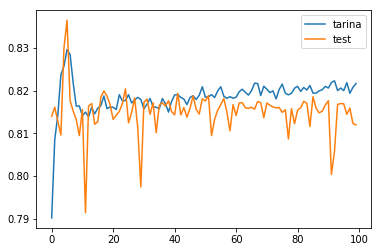

In [17]:
import matplotlib.pyplot as pl
plt.plot(history.history['accuracy'], label = "tarina")
plt.plot(history.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

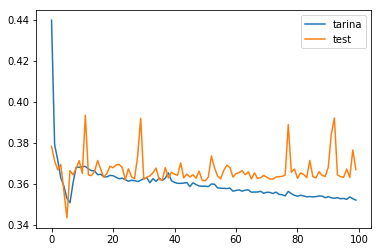

In [18]:
import matplotlib.pyplot as pl
plt.plot(history.history['loss'], label = "tarina")
plt.plot(history.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [19]:
model.predict(X_test)

array([[7.6338649e-04],
       [1.9872838e-01],
       [6.0694683e-01],
       ...,
       [7.4513763e-01],
       [5.9381592e-01],
       [8.0099720e-01]], dtype=float32)

In [20]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 13us/step


[0.36698618174232495, 0.8120185732841492]

In [21]:
print(model.predict(X_test).shape)
print(y_test.shape)

(15060, 1)
(15060,)


In [22]:
p = model.predict(X_test)
p[p<0.5]=0
p[p>0.5]=1
p

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [23]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= p )

0.8120185922974767

# Zad
Znajdź lepszą architekturą.